# Authors
# ----------------------------------------

## Kiara Gabriel             -    2161334

## Phola Bavuma          -    1848739

## Shravan Singh         -    2173638

## Arneev Singh          -    2180393

# ----------------------------------------

In [21]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import copy as copy
import random as random

In [22]:
#Constants
tabSpace = 30

#NOTE: You can adjust this value to display the amount of floating points
floatingDigits = 5

In [23]:
#Helper Function - Prints Question
def printQues(questionNumber):
    ans = "Question " + questionNumber 
    
    hashes = ""
    for i in range(len(ans)):
        hashes += '='
    
    print(ans)
    print(hashes)

In [24]:
#Question 3(a)

printQues("3(a)")

imageIn = plt.imread("peppers.bmp")

height = len(imageIn)
width = len(imageIn[0])

imageMat = []
for x in imageIn:
    for y in x:
        imageMat.append(y)

Question 3(a)


In [25]:
def getRandomRGB():
    lst = []
    for i in range(3):
        lst.append(random.randint(0,255))
        
    return lst

In [26]:
def euci(p1,p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 + (p1[2] - p2[2])**2 )

In [27]:
def clustersEqual(oldClusters, newClusters):
    if (len(oldClusters) != len(newClusters)):
        return False
    
    numbClusters = len(oldClusters)
    
    for idx in range(len(oldClusters)):
        if (len(oldClusters[idx]) != len(newClusters[idx])):
            return False
    
    for clusterIdx in range(numbClusters):
        for elementIdx in range(len(newClusters[clusterIdx])):
            oldCluster = oldClusters[clusterIdx]
            newCluster = newClusters[clusterIdx]
            
            
            for colVal in range(3):
                if (oldCluster[elementIdx][colVal] != newCluster[elementIdx][colVal]):
                    return False
            
    
    return True

In [28]:
#Question 3(b) & 3(c)

def kMeans(k,oldInputData):
    inputData = copy.deepcopy(oldInputData)
    
    centroids = []
    
    oldClusters = []
    clusters = []
    
    for i in range(k):
        centroids.append(getRandomRGB())
        clusters.append([])
    
    iteration = 0
    firstIteration = True
    while (not clustersEqual(oldClusters, clusters) or firstIteration):
        iteration += 1
        firstIteration = False
        
        for rgb in inputData:

            minDistance = math.inf
            minIndex = 0

            #Finding the min centroid
            for centroidIndex, centroid in enumerate(centroids):
                distance = euci(centroid,rgb)

                if (distance < minDistance):
                    minDistance = distance
                    minIndex = centroidIndex

            #Assign to cluster
            clusters[minIndex].append(rgb)
            
        oldClusters = copy.deepcopy(clusters)

        for clusterIndex, cluster in enumerate(clusters):
            #Getting average rgb
            avgR = 0
            avgG = 0
            avgB = 0

            for rgb in cluster:
                avgR += rgb[0]
                avgG += rgb[1]
                avgB += rgb[2]

            lengthCluster = len(cluster)
            if (lengthCluster != 0):
                avgR /= lengthCluster
                avgG /= lengthCluster
                avgB /= lengthCluster

            #Assigning centroid to the new average center
            centroids[clusterIndex][0] = avgR 
            centroids[clusterIndex][1] = avgG
            centroids[clusterIndex][2] = avgB
    
    #===========================================================
    #Getting output data
    outputData = copy.deepcopy(inputData) 
    
    for rgbIndex, rgb in enumerate(outputData):
        
        minDistance = math.inf
        minIndex = 0
        
        #Finding the min centroid
        for centroidIndex, centroid in enumerate(centroids):
            distance = euci(centroid,rgb)
            
            if (distance < minDistance):
                minDistance = distance
                minIndex = centroidIndex
        
        minCentroid = centroids[minIndex]
        
        #Setting data to closest centroid
        outputData[rgbIndex][0] = minCentroid[0]
        outputData[rgbIndex][1] = minCentroid[1]
        outputData[rgbIndex][2] = minCentroid[2]
        
    #Converting to x and y coords
    newMat = []
    lengthList = len(outputData)
    
    for i in range(lengthList // height):
        newMat.append([])
    
    for rgbIndex, rgb in enumerate(outputData):
        newMat[rgbIndex // height].append(outputData[rgbIndex])
            
    print("Iterations:", iteration)      
    return newMat

Question 3(b) & 3(c)
Iterations: 1


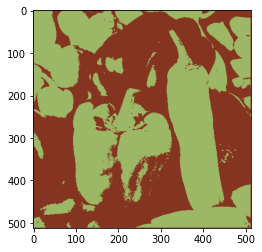

In [29]:
printQues("3(b) & 3(c)")
newData = kMeans(2,imageMat)

plt.imshow(newData)

Question 3(d)
k: 4

Iterations: 1


k: 8



KeyboardInterrupt: 

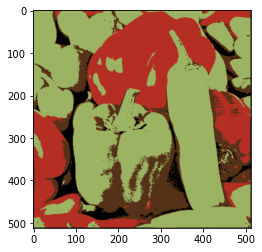

In [30]:
printQues("3(d)")

kLst = [4,8,16,32,64]


for k in kLst:
    print("============================")
    print("k:", k)
    print("============================\n")
    newData = kMeans(k,imageMat)

    plt.imshow(newData)
    
    print("\n============================\n")